## [詳解ディープラーニング　TensorFlow・Kerasによる時系列データ処理](https://book.mynavi.jp/ec/products/detail/id=72995)
　巣籠悠輔 著  
　マイナビ出版  
　ISBN : 978-4-8399-6251-7  
　発売 : 2017/05/30  
  
support site : [https://book.mynavi.jp/supportsite/detail/9784839962517.html](https://book.mynavi.jp/supportsite/detail/9784839962517.html)  
github : [yusugomori/deeplearning-tensorflow-keras](https://github.com/yusugomori/deeplearning-tensorflow-keras) 

Most of codes and explanations in this notebook are based on the textbook.  
If you want to use codes in this notebook, please check the book and original codes from the above.  

---
## ３章　単純パーセプトロン

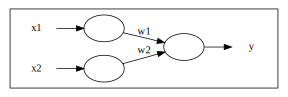

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="4,4"

with dot.subgraph(name='cluster_0') as c:
    c.node('x1', 'x1', shape='plaintext')
    c.node('x2', 'x2', shape='plaintext')
    c.node('l1a', '')
    c.node('l1b', '')
    c.edge('x1', 'l1a')
    c.edge('x2', 'l1b')
    c.node('l2', '')
    c.edge('l1a','l2', label='w1')
    c.edge('l1b', 'l2', label='w2')
    c.node('y', 'y',shape='plaintext')
    c.edge('l2','y')
    c.body.append('{rank=min; x1; x2;}')
    c.body.append('{rank=max; y;}')

dot

ニューロンのモデルとして、上の図のような１層パーセプトロンを考える。  
　（ただし、確率的な挙動は一切示さないものとする）  
入力 $x_{1}$、$x_{2}$ を受けた時に、重み付き和が閾値 $\theta$を超えた時に発火する、すなわち  
  
\begin{align*}
y=\begin{cases}
1 & (w_{1}x_{1} + w_{2}x_{2} \geq \theta \\\
0 & (w_{1}x_{1} + w_{2}x_{2} < \theta 
\end{cases}\end{align*}
に従って出力 $y$ が決定するものとする。  

上記モデルのパラメータ $(w_{1}, w_{2}, \theta)$ の値を誤り訂正学習法によって得ることを考える。  
  
正しい出力 $t$ が既知であるとき  
　$ y > t $ なら $y$ が小さくなるように修正する    
　$ y < t $ なら $y$ が大きくなるように修正する  
ことによって正しいパラメータを目指す。  
  
この修正分を $\Delta w_{1}$ 、 $\Delta w_{2}$ 、 $\Delta \theta$ と表し、k回目の学習によるパラメータを $(w_{1}^{k}, w_{2}^{k}, \theta^{k})$ とすると、この方法は  

\begin{align*}
\Delta w_{1} &= (t-y)x_{1} & w_{1}^{k+1} &= w_{1}^{k} + \Delta w_{1} \\
\Delta w_{2} &= (t-y)x_{2} & w_{2}^{k+1} &= w_{2}^{k} + \Delta w_{2} \\
\Delta \theta &= -(t-y) & \theta^{k+1} &= \theta^{k} + \Delta \theta
\end{align*}

のようにまとめることができる。  
この更新式を、$y-t=0$ となるまで行うことを試みる。  
  
パラメータの初期値を $(w_{1}, w_{2}, \theta) = (0, 0, 0)$ 、  
入力 $x_{1}, x_{2}$ は0または1の値をとり、正しい出力をANDゲートとするとき、   

In [2]:
import numpy as np
import pandas as pd

# 正解となる出力データ
def tercher_AND_gate(x1,x2):
    output = {(0,0):0, (0,1):0, (1,0):0, (1,1):1}
    return output[(x1, x2)]

# 使用するモデル
def y(x1, x2, w1, w2, theta):
    input_sum = w1*x1 + w2*x2 
    if input_sum >= theta:
        return 1
    else:
        return 0
    
def update(dataset, max_iter=100, w1=0, w2=0, theta=0, y=y, t=tercher_AND_gate):
    record = []
    iter_count = 0
    while iter_count < max_iter:
        val_dif = 0
        for i, data in enumerate(dataset):
            x1, x2 = data[0], data[1]
            t_val = t(x1, x2)
            y_val = y(x1, x2, w1, w2, theta)
            dw1 = (t_val - y_val) * x1
            dw2 = (t_val - y_val) * x2
            dtheta = -1 * (t_val - y_val)
            
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x1, x2, t_val, w1, w2, theta, y_val, t_val-y_val, dw1, dw2, dtheta])
            
            w1 += dw1
            w2 += dw2
            theta += dtheta
            
        if val_dif==0:
            break         
    else:
        pass
    
    print("update finished. iter_count={0}".format(iter_count))
    print("w1, w2, theta = {}, {}, {}".format(w1, w2, theta))
    return record
            
    
w1, w2, theta = 0, 0, 0
dataset = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

record = update(dataset, max_iter=100, w1=w1, w2=w2, theta=theta, t=tercher_AND_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x1", "x2", "t", "w1", "w2", "theta", "y", "t-y", "dw1", "dw2", "dtheta"]
df

update finished. iter_count=24
w1, w2, theta = 2, 1, 3


,k,x1,x2,t,w1,w2,theta,y,t-y,dw1,dw2,dtheta
0,1,0,0,0,0,0,0,1,-1,0,0,1
1,2,0,1,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,0,0
3,4,1,1,1,0,0,1,0,1,1,1,-1
4,5,0,0,0,1,1,0,1,-1,0,0,1
5,6,0,1,0,1,1,1,1,-1,0,-1,1
6,7,1,0,0,1,0,2,0,0,0,0,0
7,8,1,1,1,1,0,2,0,1,1,1,-1
8,9,0,0,0,2,1,1,0,0,0,0,0
9,10,0,1,0,2,1,1,1,-1,0,-1,1


In [3]:
# ORゲートの場合
import numpy as np
import pandas as pd

def tercher_OR_gate(x1,x2):
    output = {(0,0):0, (0,1):1, (1,0):1, (1,1):1}
    return output[(x1, x2)]

w1, w2, theta = 0, 0, 0
dataset = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

record = update(dataset, max_iter=100, w1=w1, w2=w2, theta=theta, t=tercher_OR_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x1", "x2", "t", "w1", "w2", "theta", "y", "t-y", "dw1", "dw2", "dtheta"]
df

update finished. iter_count=16
w1, w2, theta = 1, 1, 1


,k,x1,x2,t,w1,w2,theta,y,t-y,dw1,dw2,dtheta
0,1,0,0,0,0,0,0,1,-1,0,0,1
1,2,0,1,1,0,0,1,0,1,0,1,-1
2,3,1,0,1,0,1,0,1,0,0,0,0
3,4,1,1,1,0,1,0,1,0,0,0,0
4,5,0,0,0,0,1,0,1,-1,0,0,1
5,6,0,1,1,0,1,1,1,0,0,0,0
6,7,1,0,1,0,1,1,0,1,1,0,-1
7,8,1,1,1,1,1,0,1,0,0,0,0
8,9,0,0,0,1,1,0,1,-1,0,0,1
9,10,0,1,1,1,1,1,1,0,0,0,0


In [4]:
# NOTゲートの場合

# 書籍と結果が違うが、書籍のほうでは
# y=1 if w*x >= theta　の不等号が　>　に置き換わっている？

import numpy as np
import pandas as pd

def tercher_NOT_gate(x):
    output = {0:1, 1:0}
    return output[x]

def y_single(x, w, theta):
    return 1 if w*x >= theta else 0

    # 書籍と同じ結果を出すなら
    #return 1 if w*x > theta else 0

def update_NOT_gate(dataset, max_iter=100, w=0, theta=0, y=y_single, t=tercher_NOT_gate):
    record = []
    iter_count = 0
    while iter_count < max_iter:
        val_dif = 0
        for i, data in enumerate(dataset):
            x = data[0]
            t_val, y_val = t(x), y(x, w, theta)
            dw, dtheta = (t_val - y_val) * x, -1*(t_val-y_val)
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x, t_val, w, theta, y_val, t_val-y_val, dw, dtheta])
            w += dw
            theta += dtheta  
        if val_dif==0:
            break         
    else:
        pass
    
    print("update finished. iter_count={0}".format(iter_count))
    print("w, theta = {}, {}".format(w, theta))
    return record
    
w, theta, dataset = 0, 0, [[0,1],[1,0]]
record = update_NOT_gate(dataset, max_iter=100, w=w, theta=theta, y=y_single, t=tercher_NOT_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x", "t", "w", "theta", "y", "t-y", "dw", "dtheta"]
df

update finished. iter_count=6
w, theta = -1, 0


,k,x,t,w,theta,y,t-y,dw,dtheta
0,1,0,1,0,0,1,0,0,0
1,2,1,0,0,0,1,-1,-1,1
2,3,0,1,-1,1,0,1,0,-1
3,4,1,0,-1,0,0,0,0,0
4,5,0,1,-1,0,1,0,0,0
5,6,1,0,-1,0,0,0,0,0


In [1]:
# 一括対応ver

import numpy as np
import pandas as pd

# 正解となる出力データ
def teacher_gate(x, teacher_data):
    return teacher_data[tuple(x)]

# 使用するモデル
def gate_model(x,w,theta):
    return 1 if np.sum(np.multiply(x,w)) >= theta else 0
    
def update(dataset, w, theta, teacher_data, max_iter=100, y=gate_model, t=teacher_gate):
    record = []
    iter_count, val_dif = 0, 1
    while (iter_count < max_iter) and (val_dif != 0):
        val_dif = 0
        
        for x in dataset:
            x = np.array(x)
            t_val, y_val = t(x, teacher_data), y(x, w, theta)
            dw = (t_val - y_val) * x
            dtheta = -1 * (t_val - y_val)
            
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x, t_val, w, theta, y_val, t_val-y_val, dw, dtheta])
            w = np.add(w,dw)
            theta += dtheta
 
    print("update finished. iter_count={0}".format(iter_count))
    print("w, theta = {}, {}".format(w, theta))
    return record

dataset = {"two_input" : [[0,0],[0,1],[1,0],[1,1]],
           "one_input" : [[0],[1]]
          }
teacher_data = {"AND_gate" : {(0,0):0, (0,1):0, (1,0):0, (1,1):1},
                "OR_gate" : {(0,0):0, (0,1):1, (1,0):1, (1,1):1},
                "NOT_gate" : {(0,):1, (1,):0}
               }

# 初期値
w, theta = np.array([0,0]), np.array(0)

record = update(dataset["two_input"], w=w, theta=theta, 
                teacher_data = teacher_data["OR_gate"],
                max_iter=100)
df = pd.DataFrame(record)
df.columns = ["k", "x", "t", "w", "theta", "y", "t-y", "dw", "dtheta"]
df

update finished. iter_count=16
w, theta = [1 1], 1


,k,x,t,w,theta,y,t-y,dw,dtheta
0,1,"[0, 0]",0,"[0, 0]",1,1,-1,"[0, 0]",1
1,2,"[0, 1]",1,"[0, 0]",1,0,1,"[0, 1]",-1
2,3,"[1, 0]",1,"[0, 1]",1,1,0,"[0, 0]",0
3,4,"[1, 1]",1,"[0, 1]",1,1,0,"[0, 0]",0
4,5,"[0, 0]",0,"[0, 1]",1,1,-1,"[0, 0]",1
5,6,"[0, 1]",1,"[0, 1]",1,1,0,"[0, 0]",0
6,7,"[1, 0]",1,"[0, 1]",1,0,1,"[1, 0]",-1
7,8,"[1, 1]",1,"[1, 1]",1,1,0,"[0, 0]",0
8,9,"[0, 0]",0,"[1, 1]",1,1,-1,"[0, 0]",1
9,10,"[0, 1]",1,"[1, 1]",1,1,0,"[0, 0]",0
